#### exercice 1

In [1]:
a <- c('A','B','C','A','B','D', 'A')

In [2]:
which(a=='A')

[1] 1 4 7

#### exercice 2

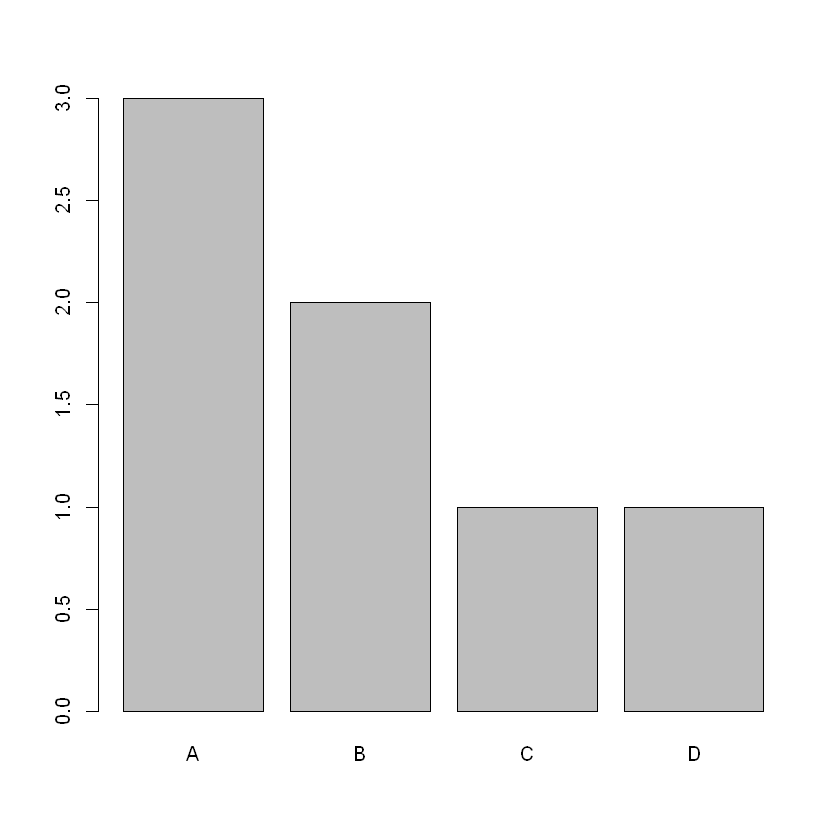

In [3]:
barplot(table(a))

#### exercice 4

In [4]:
data <- read.csv2('../data/smp2.csv')

In [5]:
str(data)

'data.frame':	799 obs. of  26 variables:
 $ age         : int  31 49 50 47 23 34 24 52 42 45 ...
 $ prof        : Factor w/ 8 levels "agriculteur",..: 3 NA 7 6 8 6 3 2 6 6 ...
 $ duree       : int  4 NA 5 NA 4 NA NA 5 4 NA ...
 $ discip      : int  0 0 0 0 1 0 0 0 1 0 ...
 $ n.enfant    : int  2 7 2 0 1 3 5 2 1 2 ...
 $ n.fratrie   : int  4 3 2 6 6 2 3 9 12 5 ...
 $ ecole       : int  1 2 2 1 1 2 1 2 1 2 ...
 $ separation  : int  0 1 0 1 1 0 1 0 1 0 ...
 $ juge.enfant : int  0 0 0 0 NA 0 1 0 1 0 ...
 $ place       : int  0 0 0 1 1 0 1 0 0 0 ...
 $ abus        : int  0 0 0 0 0 0 0 0 1 1 ...
 $ grav.cons   : int  1 2 2 1 2 1 5 1 5 5 ...
 $ dep.cons    : int  0 0 0 0 1 0 1 0 1 0 ...
 $ ago.cons    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ptsd.cons   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alc.cons    : int  0 0 0 0 0 0 0 0 1 1 ...
 $ subst.cons  : int  0 0 0 0 0 0 1 0 1 0 ...
 $ scz.cons    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ char        : int  1 1 1 1 1 1 1 1 4 1 ...
 $ rs          : int  2 2 2 2 2 1 3

Quel est le nombre moyen d'enfants (variable n.enfant) chez les individus diagnostiqués comme dépressifs (dep.cons = 1) (2 chiffres après la virgule) ?

In [6]:
round(mean(subset(data, dep.cons == 1, n.enfant)$n.enfant, na.rm=TRUE), digits = 2)

[1] 1.76

#### exercice 5

Donner la borne supérieure de l'intervalle interquartile pour la variable duree chez les individus dont l'âge est strictement inférieur à 35 ans (2 chiffres après la virgule).

In [7]:
summary(data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   19.0    28.0    37.0    38.9    48.0    83.0       2 

In [8]:
quantile(data$age, na.rm=TRUE)[4]

75% 
 48

In [9]:
round(
    quantile(
        subset(
            data, age < 35, duree
        ), na.rm=TRUE
    )[4],
    digits=2)

75% 
  5

In [10]:
#quantile(smp$duree[smp$age < 35], na.rm = TRUE)
#ou
#summary(smp$duree[smp$age < 35], na.rm = TRUE)
#ou
#quantile(smp$duree[smp$age < 35], na.rm = TRUE, probs = .75)

#### exercice 6

Nous souhaitons estimer la durée moyenne d'intervention (dur.interv) chez les individus ayant au moins un antécédent de tentative de suicide (suicide.past = 1). Quelle commande pouvons-nous utiliser ?

In [11]:
mean(
subset(data, suicide.past >= 1, dur.interv)$dur.interv, na.rm=TRUE)

[1] 67.35071

In [12]:
mean(data[data$suicide.past == 1, 'dur.interv'], na.rm=TRUE)

[1] 67.35071

In [13]:
 mean(data$dur.interv[data$suicide.past == 1])

[1] NA

#### exercice 7

À partir du data frame smp, nous souhaitons recoder l’âge (variable age) en variable catégorielle en considérant 4 intervalles de classe dont les bornes intermédiaires sont définies à partir des 1er, 2ème et 3ème quartiles.

Les bornes inférieures et supérieures de la première et dernière classe seront naturellement les valeurs minimale et maximale observées pour la variable age. À l'exception de la première classe dont les deux bornes d'intervalle seront fermées (c'est-à-dire que les bornes seront inclues dans l'intervalle), les bornes inférieures des classes suivantes (2 à 4) seront ouvertes, et les bornes supérieures fermées. Indiquer l'effectif associé à la 3ème classe ainsi constituée.

In [14]:
summary(data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   19.0    28.0    37.0    38.9    48.0    83.0       2 

In [15]:
min(data$age, na.rm=TRUE)

[1] 19

In [16]:
length(data$age) / 4

[1] 199.75

In [17]:
help(length)

In [18]:
summary(data$age)
data$age.cat <- cut(data$age, breaks = c(19, 28, 37, 48, 83), include.lowest = TRUE)
table(data$age.cat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   19.0    28.0    37.0    38.9    48.0    83.0       2 


[19,28] (28,37] (37,48] (48,83] 
    212     190     209     186 

##### SECTION 2 bis

Nous supposons que nous disposons d'une variable numérique x, sans données manquantes, dont nous souhaitons représenter la distribution sous forme d'histogramme d'effectifs constitué de 6 classes d'intervalles. Quelle commande pouvons nous utiliser ?

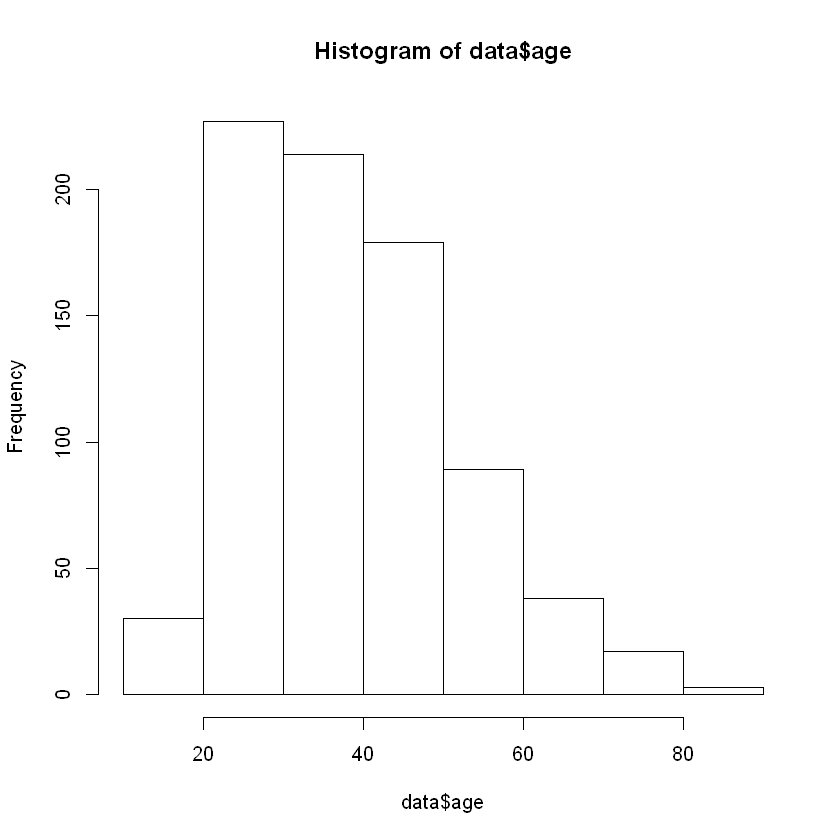

In [25]:
hist(data$age, breaks=6)

In [24]:
help(hist)

Pour afficher un tableau de fréquences relatives d'une variable qualitative z (sans données manquantes), nous utilisons la commande

In [29]:
prop.table(table(data$age))


         19          20          21          22          23          24 
0.018820577 0.018820577 0.022584693 0.016311167 0.028858218 0.037641154 
         25          26          27          28          29          30 
0.027603513 0.037641154 0.031367629 0.026348808 0.025094103 0.031367629 
         31          32          33          34          35          36 
0.022584693 0.027603513 0.032622334 0.025094103 0.020075282 0.022584693 
         37          38          39          40          41          42 
0.031367629 0.030112923 0.028858218 0.027603513 0.028858218 0.023839398 
         43          44          45          46          47          48 
0.021329987 0.023839398 0.021329987 0.020075282 0.015056462 0.021329987 
         49          50          51          52          53          54 
0.028858218 0.020075282 0.013801757 0.012547051 0.010037641 0.013801757 
         55          56          57          58          59          60 
0.007528231 0.017565872 0.011292346 0.008782936 0.

Existe-t-il des données manquantes parmi les individus dont les n° d'observation (n° de ligne dans le data frame smp) sont les suivants : 20, 221, 342, 446, 531.

In [34]:
str(data[c(20,221,342,446,531),])

'data.frame':	5 obs. of  27 variables:
 $ age         : int  28 57 37 51 51
 $ prof        : Factor w/ 8 levels "agriculteur",..: 6 8 8 6 2
 $ duree       : int  5 5 4 3 5
 $ discip      : int  0 0 0 0 0
 $ n.enfant    : int  1 2 1 1 4
 $ n.fratrie   : int  1 2 2 3 5
 $ ecole       : int  2 2 1 3 1
 $ separation  : int  0 0 1 0 0
 $ juge.enfant : int  0 0 0 0 0
 $ place       : int  0 0 0 0 0
 $ abus        : int  0 1 0 0 1
 $ grav.cons   : int  2 5 1 2 6
 $ dep.cons    : int  0 1 0 0 1
 $ ago.cons    : int  0 0 0 0 0
 $ ptsd.cons   : int  0 0 0 0 0
 $ alc.cons    : int  0 0 0 0 0
 $ subst.cons  : int  1 0 0 0 0
 $ scz.cons    : int  0 0 0 0 1
 $ char        : int  1 2 1 1 2
 $ rs          : int  2 1 1 2 3
 $ ed          : int  2 3 2 2 3
 $ dr          : int  2 3 2 2 3
 $ suicide.s   : int  0 4 0 0 3
 $ suicide.hr  : int  0 1 0 0 1
 $ suicide.past: int  1 1 0 0 0
 $ dur.interv  : int  95 50 30 85 68
 $ age.cat     : Factor w/ 4 levels "[19,28]","(28,37]",..: 1 4 2 4 4


In [48]:
summary(data[c(20,221,342,446,531),])

      age                prof       duree         discip     n.enfant  
 Min.   :28.0   ouvrier    :2   Min.   :3.0   Min.   :0   Min.   :1.0  
 1st Qu.:37.0   sans emploi:2   1st Qu.:4.0   1st Qu.:0   1st Qu.:1.0  
 Median :51.0   artisan    :1   Median :5.0   Median :0   Median :1.0  
 Mean   :44.8   agriculteur:0   Mean   :4.4   Mean   :0   Mean   :1.8  
 3rd Qu.:51.0   autre      :0   3rd Qu.:5.0   3rd Qu.:0   3rd Qu.:2.0  
 Max.   :57.0   cadre      :0   Max.   :5.0   Max.   :0   Max.   :4.0  
                (Other)    :0                                          
   n.fratrie       ecole       separation   juge.enfant     place  
 Min.   :1.0   Min.   :1.0   Min.   :0.0   Min.   :0    Min.   :0  
 1st Qu.:2.0   1st Qu.:1.0   1st Qu.:0.0   1st Qu.:0    1st Qu.:0  
 Median :2.0   Median :2.0   Median :0.0   Median :0    Median :0  
 Mean   :2.6   Mean   :1.8   Mean   :0.2   Mean   :0    Mean   :0  
 3rd Qu.:3.0   3rd Qu.:2.0   3rd Qu.:0.0   3rd Qu.:0    3rd Qu.:0  
 Max.   :5.0   M

In [36]:
sum(is.na(data[c(20,221,342,446,531),]))

[1] 0

Quelle est la proportion relative d'individus (exprimée en %) sans emploi parmi l'ensemble des 799 individus (2 chiffres après la virgule)?

In [39]:
sum(table(data$prof, useNA = 'always'))

[1] 799

In [40]:
prop.table(table(data$prof, useNA = 'always'))


       agriculteur            artisan              autre              cadre 
       0.007509387        0.112640801        0.038798498        0.030037547 
           employe            ouvrier prof.intermediaire        sans emploi 
       0.168961202        0.284105131        0.072590738        0.277847309 
              <NA> 
       0.007509387 

In [41]:
prop.table(table(data$prof, useNA = 'always'))['sans emploi']

sans emploi 
  0.2778473

In [42]:
round(prop.table(table(data$prof, useNA = 'always'))['sans emploi'] * 100, 2)

sans emploi 
      27.78

Combien d'individus ont un âge compris entre 20 et 30 ans, inclus ?

In [47]:
nrow(subset(data, age >= 20 & age <= 30))

[1] 242

In [53]:
data$age

[1] 31 49 50 47 23 34 24 52 42 45 31 NA 21 40 64 67 60 63 NA 28 20 30 32 31 26
 [26] 42 32 40 41 27 24 38 39 36 29 41 36 41 21 21 46 22 21 35 45 38 19 21 27 40
 [51] 39 47 24 36 39 22 38 37 29 23 36 42 56 28 36 38 43 29 64 25 51 35 30 37 26
 [76] 36 58 32 30 26 27 23 24 39 43 39 26 44 37 40 24 46 26 38 37 30 39 36 39 28
[101] 27 51 48 47 41 35 25 31 44 40 29 34 49 57 33 35 32 34 46 45 31 42 48 34 34
[126] 64 50 53 49 53 37 42 55 32 33 40 29 32 23 61 39 30 37 30 39 49 44 40 56 43
[151] 27 21 44 50 50 20 37 42 27 22 25 20 21 19 25 24 49 24 26 35 22 24 23 46 26
[176] 41 51 20 30 37 49 28 28 51 40 33 25 29 40 43 35 50 44 35 24 43 26 45 42 45
[201] 48 45 34 31 40 22 42 38 38 40 46 26 29 25 40 43 28 29 32 28 57 31 71 33 24
[226] 22 25 26 52 33 38 39 41 52 33 39 59 33 50 58 23 41 43 42 22 57 41 30 66 49
[251] 46 28 59 35 44 83 34 49 60 56 46 62 41 27 53 48 66 66 55 61 43 54 38 51 51
[276] 50 56 53 49 41 44 64 42 52 72 43 30 32 43 25 27 25 52 39 42 59 46 62 50 24
[301] 43 32 67 28 44 19 20 23 26 28 31 42 57 30 36 53 33 25 22 42 25 32 23 45 48
[326] 35 37 38 24 47 61 38 27 27 26 30 47 37 30 41 29 37 28 47 26 50 23 60 37 48
[351] 41 28 54 61 33 31 25 66 26 29 29 53 24 48 40 47 40 41 54 25 36 44 32 27 31
[376] 34 34 71 20 54 39 50 36 37 43 28 21 35 36 53 36 38 66 62 38 24 49 21 34 29
[401] 36 29 33 34 57 65 25 36 31 54 49 42 30 20 23 21 23 39 45 29 21 54 77 23 32
[426] 58 49 26 40 51 62 45 41 30 52 20 36 34 35 30 46 79 66 19 41 51 26 56 33 39
[451] 72 45 59 21 41 43 55 26 49 29 26 28 77 61 63 30 49 48 45 32 56 48 64 73 33
[476] 74 54 27 49 45 27 53 62 54 37 56 60 33 34 32 44 49 46 67 39 59 63 81 38 58
[501] 42 73 48 41 28 44 45 46 50 27 56 46 42 25 23 26 19 24 24 32 23 24 33 21 33
[526] 41 24 31 19 25 51 39 22 20 30 34 28 20 20 33 24 32 37 25 24 29 19 37 56 49
[551] 60 29 22 20 49 33 30 29 25 62 41 33 44 60 24 24 33 27 45 33 44 23 23 35 36
[576] 28 24 27 27 28 27 40 52 19 31 21 33 23 30 23 31 48 24 24 26 32 29 38 23 50
[601] 26 47 38 24 24 19 25 31 33 26 38 23 37 19 49 33 30 38 30 26 27 21 31 19 26
[626] 28 49 35 25 32 27 20 30 25 21 54 27 22 39 21 54 49 23 36 59 50 24 47 42 41
[651] 33 46 23 19 39 38 40 39 40 44 26 48 47 23 25 20 45 44 57 39 55 19 34 28 33
[676] 19 33 27 46 47 22 27 26 52 56 44 63 34 41 38 37 58 37 24 60 26 21 52 20 37
[701] 32 32 58 49 32 37 46 50 44 47 37 38 50 56 30 34 43 55 43 31 55 41 68 45 48
[726] 42 71 38 46 65 51 57 57 71 40 43 71 48 34 69 43 35 62 34 51 48 36 44 49 74
[751] 19 56 57 65 52 77 29 37 45 40 72 27 56 35 30 37 30 40 54 26 48 83 32 22 48
[776] 67 58 37 24 34 39 38 39 56 35 26 70 68 42 41 40 26 50 27 28 44 31 38 71